# Finance Data Project 

<img src="images/crisis.jpg"/>

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

# Alternative:
# df = pd.read_pickle('all_banks')

In [4]:
# Example: 'MS' DataFrame
MS

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,28.197,28.543,28.074,28.111,9221655
2015-12-30,28.722,28.849,28.455,28.482,5722800
2015-12-29,28.666,28.899,28.564,28.763,7229079
2015-12-28,28.596,28.596,28.233,28.427,6133711
2015-12-24,28.782,28.907,28.666,28.703,3166467
...,...,...,...,...,...
2006-01-09,40.749,41.213,40.741,41.136,4949824
2006-01-06,40.851,40.902,40.350,40.710,8228569
2006-01-05,40.559,40.726,40.323,40.670,6900739


In [5]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, BAC)   2517 non-null   float64
 1   (Close, C)     2517 non-null   float64
 2   (Close, GS)    2517 non-null   float64
 3   (Close, JPM)   2517 non-null   float64
 4   (Close, MS)    2516 non-null   float64
 5   (Close, WFC)   2517 non-null   float64
 6   (High, BAC)    2517 non-null   float64
 7   (High, C)      2517 non-null   float64
 8   (High, GS)     2517 non-null   float64
 9   (High, JPM)    2517 non-null   float64
 10  (High, MS)     2516 non-null   float64
 11  (High, WFC)    2517 non-null   float64
 12  (Low, BAC)     2517 non-null   float64
 13  (Low, C)       2517 non-null   float64
 14  (Low, GS)      2517 non-null   float64
 15  (Low, JPM)     2517 non-null   float64
 16  (Low, MS)      2516 non-null   float64
 17  (Low, WFC)     2517 non-null   flo

In [7]:
df.dtypes

Attributes  Symbols
Close       BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
High        BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Low         BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Open        BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Volume      BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
dtype: object

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.185  41.410  40.508  41.324  18565928.0  434.68  438.02   
2006-01-04   41.255  41.468  40.772  40.886  20230721.0  433.45  435.56   
2006-01-05   40.886  41.106  40.659  40.939  16887242.0  429.69  432.71   
2006-01-06   41.078  41.175  40.686  40.877  14348537.0  433.61  433.77   
2006-01-09   41.009  41.229  40.693  40.904  17794318.0  431.11  432.35   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   426.76  437.25  1733359.0  ...  39.739  40.653  39.435  40.527   
2006-01-04   428.88  429.16  2109140.0  ...  40.804  41.205  40.559  40.559   
2006-01-05   429.34  431.27  1279794.0  ...  40.559  40.726  40.323  40.670   
2006-01-06   427.57  431.27  1544654.0  ...  40.851  40.902  40.350  40.710   
2006-01-09   428.44  429.25  1894722.0  ...  40.749  41.213  40.741  41.136   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6421817.0  23.594  23.876  23.296  23.818  14754974.0  
2006-01-04   9527984.0  23.740  23.755  23.413  23.541  14558894.0  
2006-01-05   6900739.0  23.518  23.556  23.375  23.518  13569368.0  
2006-01-06   8228569.0  23.581  23.720  23.437  23.651  11255751.0  
2006-01-09   4949824.0  23.651  23.755  23.556  23.651   7526696.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks['BAC']['Close'].max()

48.187

In [13]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 48.187
C 500.4
GS 212.73
JPM 60.446999999999996
MS 62.07
WFC 48.855


In [14]:
# Using .xs():
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.187
C      500.400
GS     212.730
JPM     60.447
MS      62.070
WFC     48.855
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010599,-0.018502,-0.013565,-0.014229,0.000790,-0.011630
2006-01-05,0.001296,0.004917,-0.000367,0.003046,0.002737,-0.000977
2006-01-06,-0.001514,0.000000,0.013848,0.007063,0.000984,0.005655
2006-01-09,0.000661,-0.004684,0.012121,0.016223,0.010464,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

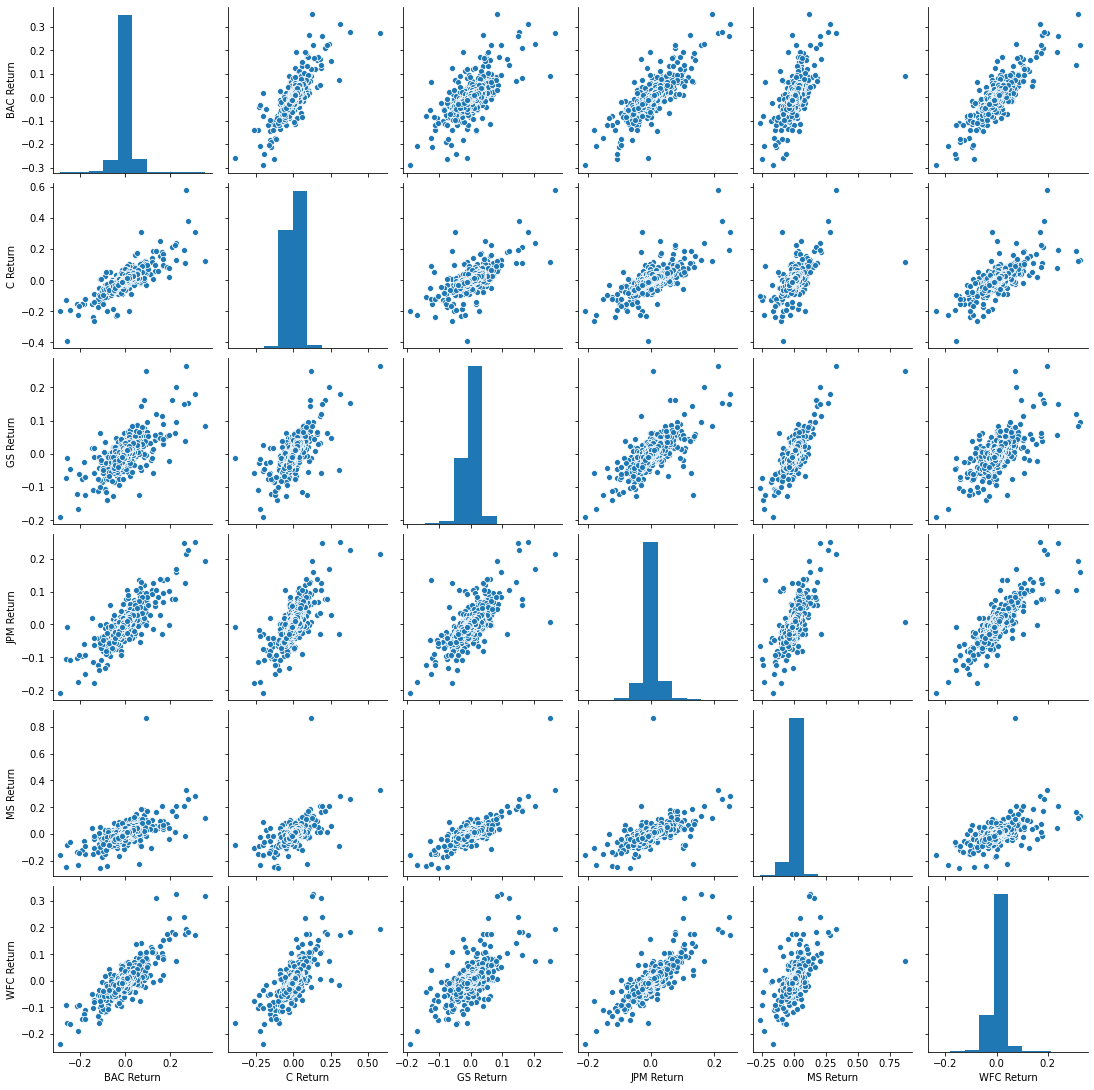

In [17]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

In [19]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
returns.std() # Citigroup riskiest

BAC Return    0.036604
C Return      0.038616
GS Return     0.025369
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016148
C Return      0.015279
GS Return     0.014026
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

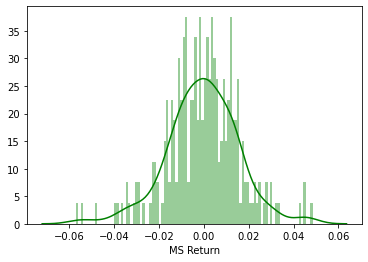

In [22]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

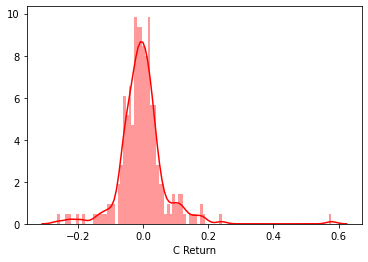

In [23]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

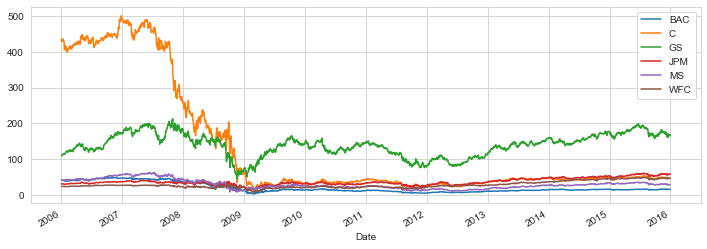

In [25]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
    
plt.legend()

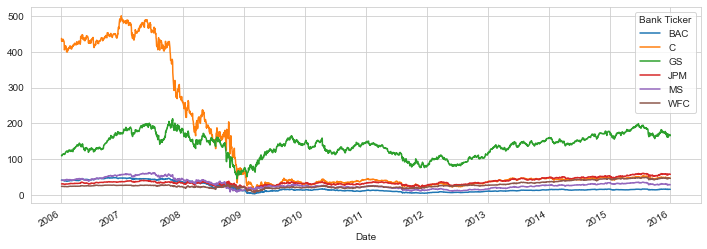

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [27]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

<img src="images/fplotly.png"/>

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [28]:
# Cronological Order
Reverse = BAC['Close'].iloc[::-1]
Reverse

Date
2006-01-03    41.324
2006-01-04    40.886
2006-01-05    40.939
2006-01-06    40.877
2006-01-09    40.904
               ...  
2015-12-24    15.651
2015-12-28    15.524
2015-12-29    15.658
2015-12-30    15.453
2015-12-31    15.252
Name: Close, Length: 2517, dtype: float64

In [29]:
# Test the date target
Reverse.loc['2008-01-01':'2009-01-01']

Date
2008-01-02    35.600
2008-01-03    35.374
2008-01-04    34.979
2008-01-07    35.024
2008-01-08    33.717
               ...  
2008-12-24    11.877
2008-12-26    11.727
2008-12-29    11.358
2008-12-30    11.625
2008-12-31    12.359
Name: Close, Length: 253, dtype: float64

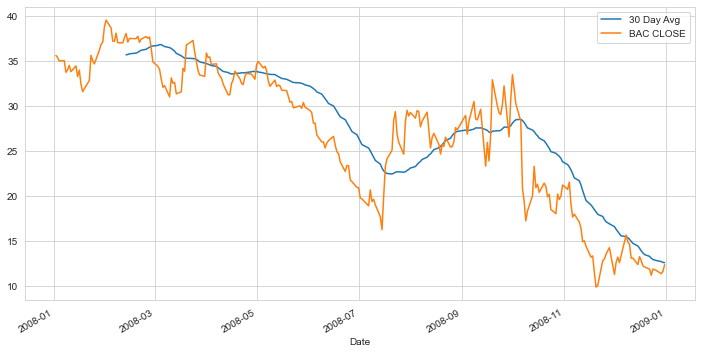

In [30]:
plt.figure(figsize=(12,6))
Reverse.loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
Reverse.loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

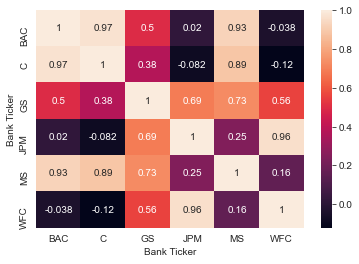

In [31]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

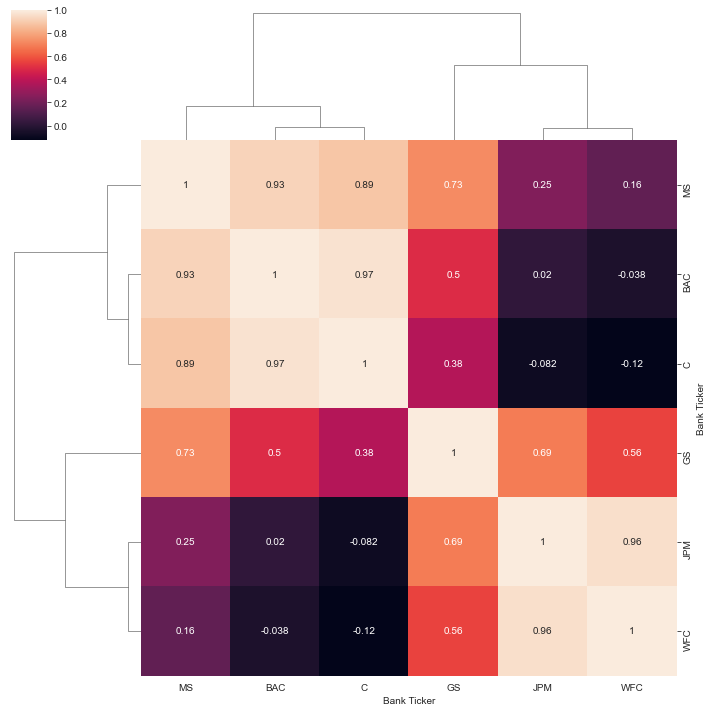

In [32]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [33]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

<img src="images/fplotly2.png"/>